# **1. Entendimiento del Negocio**

Una clinica de ginecobstetria  que cuentacon la informacion de 2.126 histogramas de fetos quiere ser capaz de determinar si un feto es normal, sospechoso o cuenta con alguna patologia cardiaca.

# **2. Enfoque Analítico**

Desarrollar un experimento de clasificación que permita determinar si un feto es normal, sospechoso o cuenta con alguna patologia cardiaca, con un nivel de desempeño superior al 85%

# **3. Requerimiento de Datos**


- Señales fetales
- Señales uterinas
- Características del histograma


# **4. Recolección de los Datos**

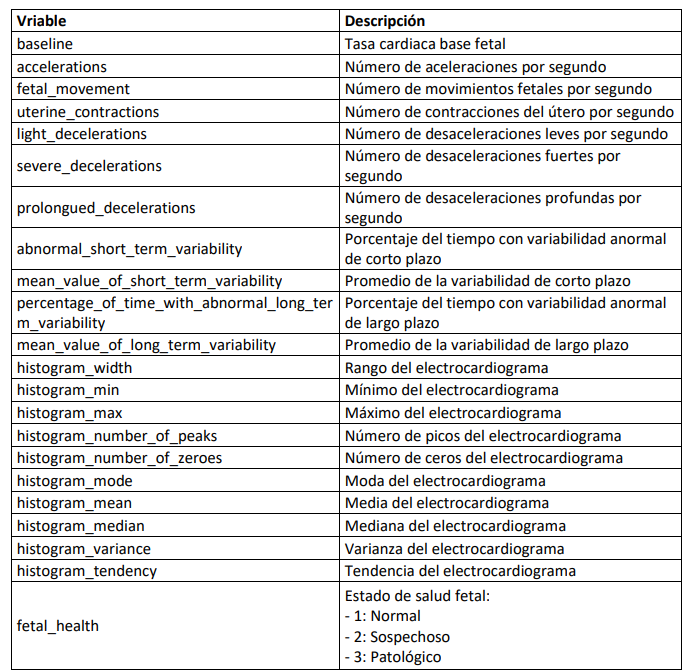

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('datos_caso_2.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#**5. Entendimiento de los datos**

- Datos nulos
- Estadísticas univariada, bivariada y multivariada
- Desbalance de y

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Identificación de datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

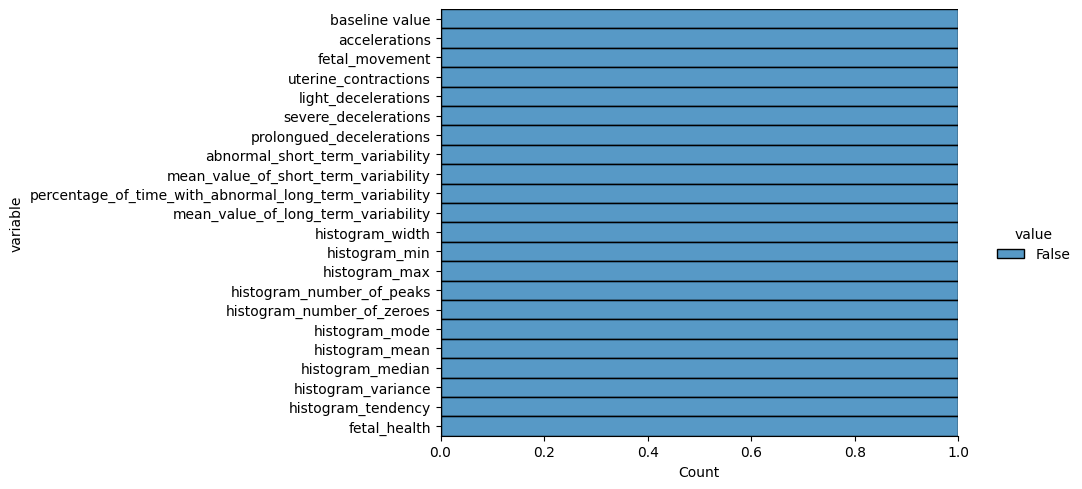

In [4]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

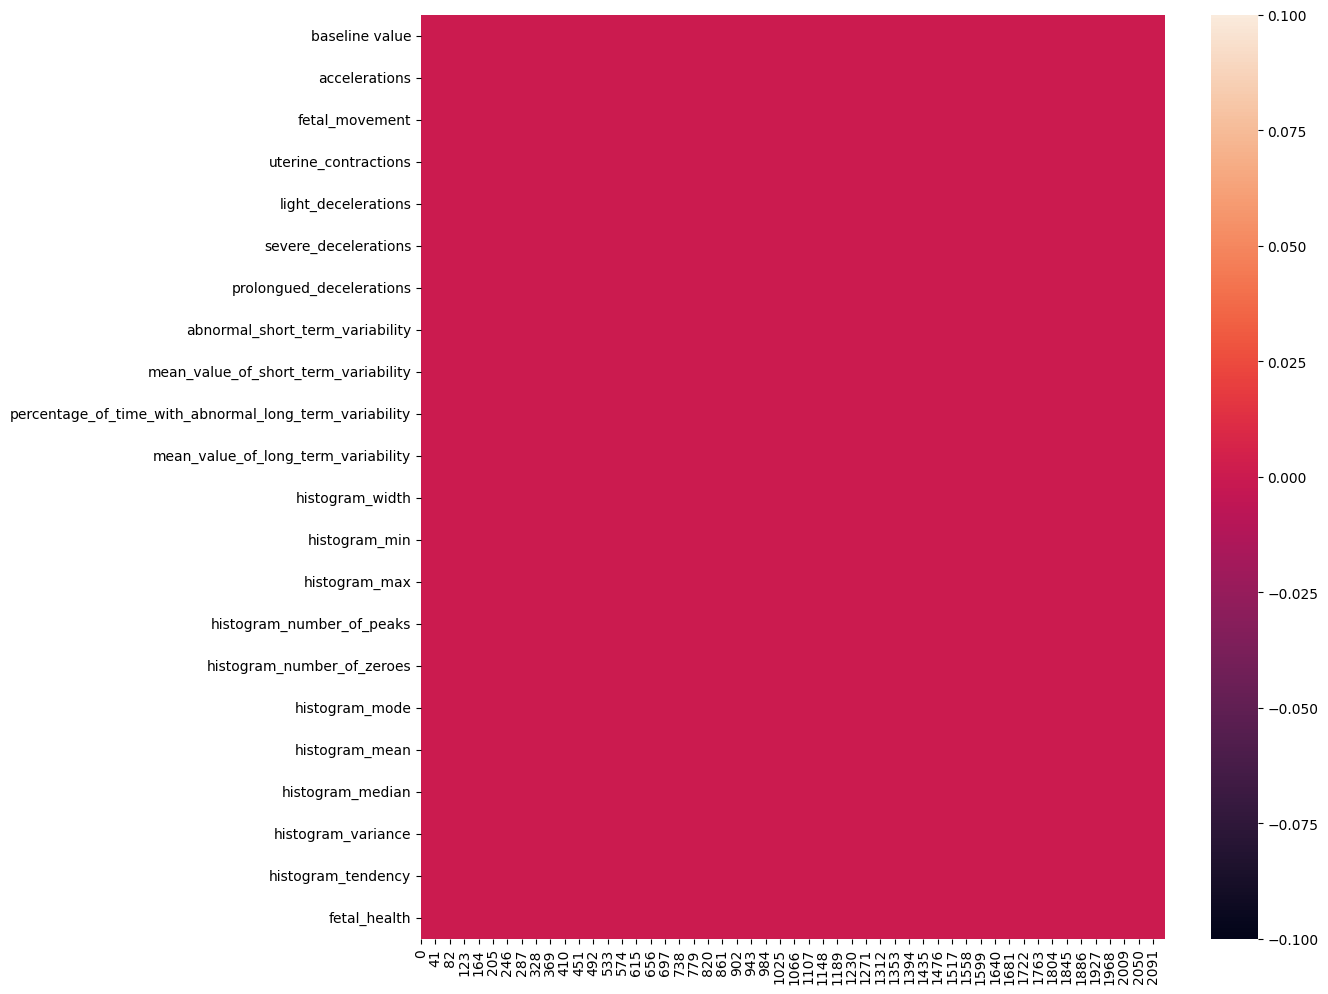

In [5]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

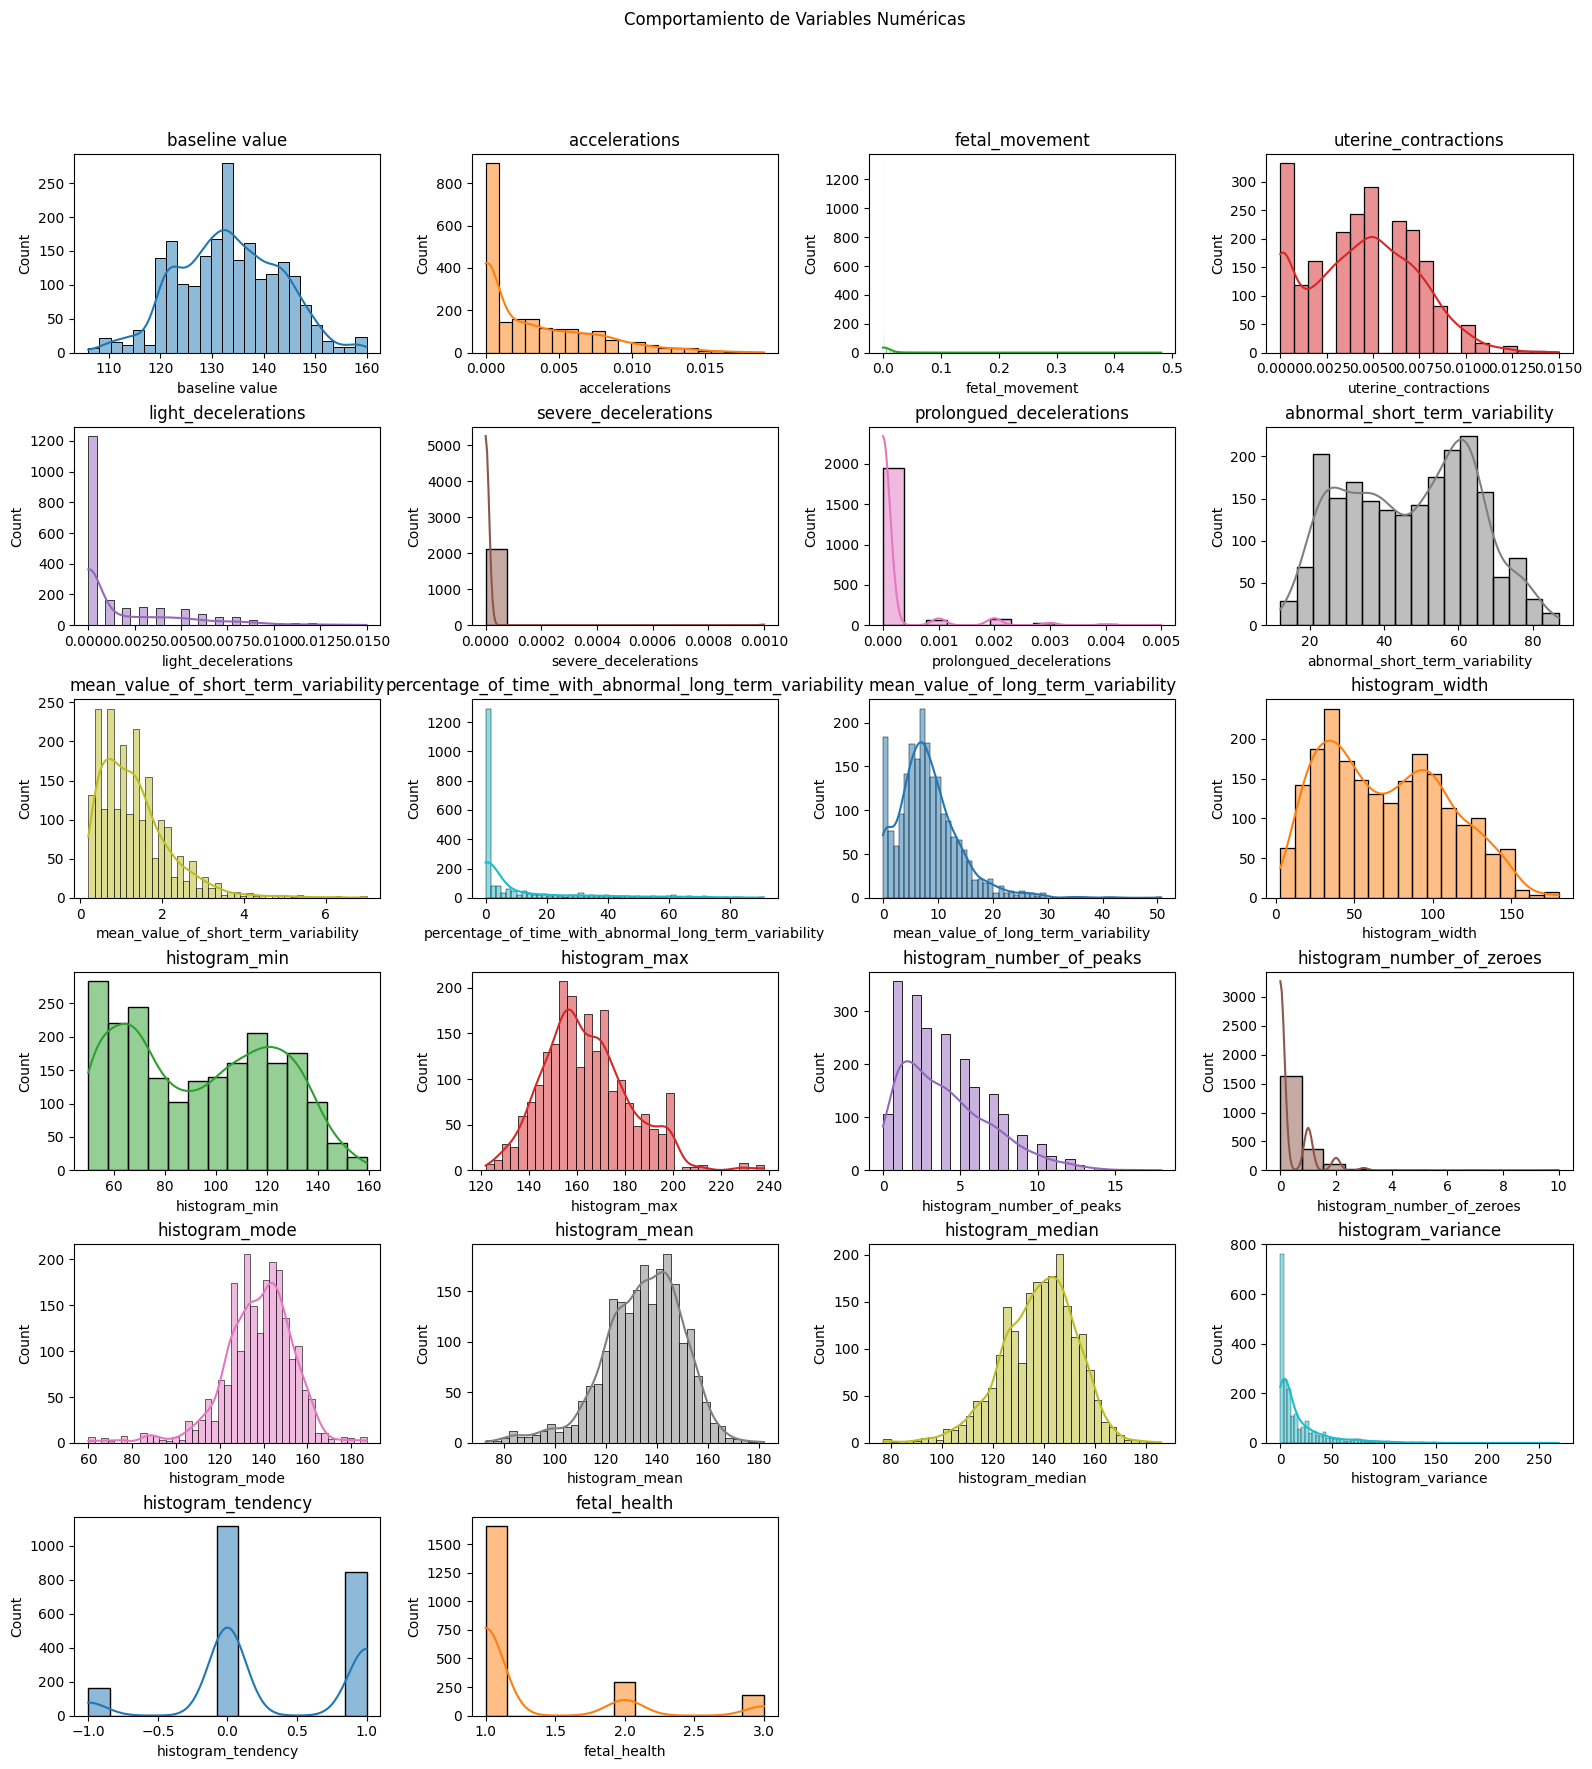

In [6]:
import matplotlib.pyplot as plt

#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(6, 4, figsize = (16, 18))  # 6x4=24 subplots for 22 columns
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 8)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
# Hide unused axes if any
for j in range(len(num_col), len(ax)):
    ax[j].set_visible(False)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

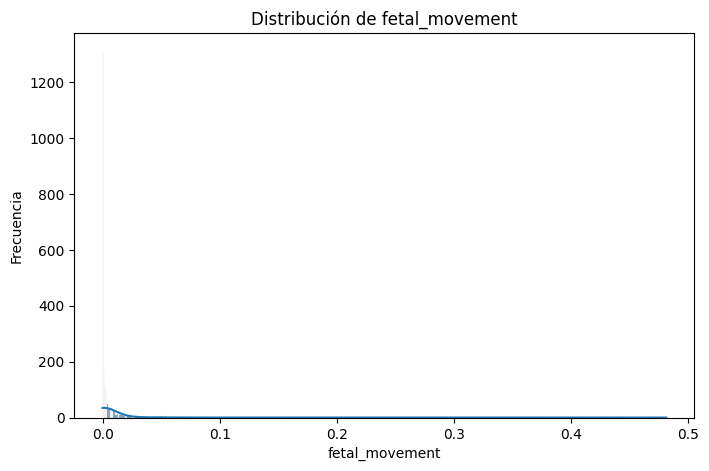

count    2126.000000
mean        0.009481
std         0.046666
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003000
max         0.481000
Name: fetal_movement, dtype: float64


In [7]:
# Exploración univariada de fetal_movement
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(8, 5))
sb.histplot(data=data, x='fetal_movement', kde=True)
plt.title('Distribución de fetal_movement')
plt.xlabel('fetal_movement')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas
print(data['fetal_movement'].describe())

# Si es categórica, puedes ver los conteos
if data['fetal_movement'].dtype == 'object':
    print(data['fetal_movement'].value_counts())

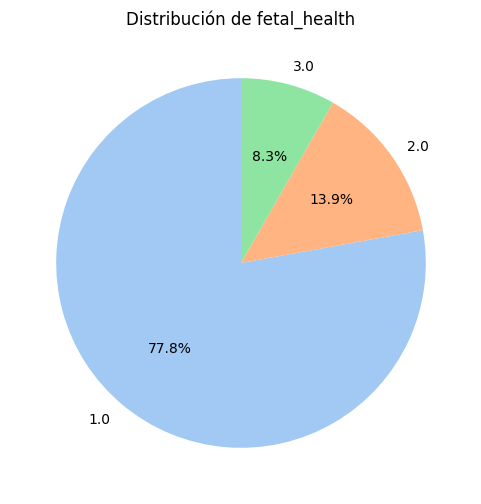

In [8]:
# Convertir fetal_health a categórica y graficar diagrama de pie

# Graficar diagrama de pie
plt.figure(figsize=(6, 6))
data['fetal_health'].astype('object').value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'))
plt.title('Distribución de fetal_health')
plt.ylabel('')
plt.show()

# **6. Preparación de los Datos**

- Eliminar variables que no son significativas
- Completar variables que cuentan con datos nulos
- Balancear y
- Transformar los datos para que sean usables por el modelo
- Separar en conjuntos de entrenamiento y prueba

In [14]:
# data_mod = data.drop(columns = ['Name', 'Location', 'ID', 'Age'])
# data_mod.info()

### Imputación de Datos Nulos

Los vamos a **imputar**

1. Simple:

Tiene dos formas.

**Constante:** Defino un número con el cual voy a imputar, osea a todos los individuos se les pone el mismo valor en el dato nulo

**Medida de tendencia:** Si es numérica uso media y mediana. Si es categórica uso moda.

La forma constante refuerza frecuencia. Las de medida de tendencia refuerzan media, mediana o moda.

Se usa el método **fillna** de pandas.

2. Modelo:

Son modelos de regresión, la y no se trata como categórica si no como numérica, entonces si la y es categórica primero hay que pasarla a numérica

**Vecindad:** Utilizo método de vecinos cercanos donde se completa el dato nulo con la media de los n vecinos de individuo que tiene datos nulos. Llena todos los nulos del individuo.

**Recursiva:** Toma de forma inicial una imputación por medida de tendencia central y completa los nulos.

Pasos:

1. Toma de forma inicial una imputación por medida de tendencia central y completa los nulos.
2. Elige una columna a completar
3. Immplementa un modelo donde la variable es y


In [15]:
# data_mod.fillna(20).info()

Transformar de manera ordinal las variables categóricas con miras a imputar los datos. Para la imputación siempre utilizamos codificación ordinal. `["Rojo", "Verde", "Azul"] → [0, 1, 2].`

In [16]:
# No es necesario hacer esto porque no tenemos variables categóricas
'''
import sklearn
data_mod = data
categorical_cols = data_mod.select_dtypes(include = ['object']).columns
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(), categorical_cols), remainder = 'passthrough')
categorical_transformer
'''


"\nimport sklearn\ndata_mod = data\ncategorical_cols = data_mod.select_dtypes(include = ['object']).columns\ncategorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(), categorical_cols), remainder = 'passthrough')\ncategorical_transformer\n"

In [17]:
# data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data_mod),
#                                columns = categorical_transformer.get_feature_names_out(),
#                                index = data_mod.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns = lambda x: x.removeprefix('remainder__'))
# data_transformed

data_transformed = data

In [18]:
# No es necesario hacer esto porque no tenemos nulos
# Imputación por vecindad
'''
knn_imputer = sklearn.impute.KNNImputer(n_neighbors = 5)
data_knn_df = pd.DataFrame(knn_imputer.fit_transform(data_transformed).round(),
                           columns = data_transformed.columns,
                           index = data_transformed.index)
data_knn_df.info()
'''

'\nknn_imputer = sklearn.impute.KNNImputer(n_neighbors = 5)\ndata_knn_df = pd.DataFrame(knn_imputer.fit_transform(data_transformed).round(),\n                           columns = data_transformed.columns,\n                           index = data_transformed.index)\ndata_knn_df.info()\n'

In [19]:
# No es necesario hacer esto porque no tenemos nulos
# Imputación recursiva
'''
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
recursive_imputer = sklearn.impute.IterativeImputer(estimator = LinearRegression(),
                                                    initial_strategy = 'mean',
                                                    max_iter = 10)
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),
                                 columns = data_transformed.columns,
                                index = data_transformed.index)
data_recursive_df.info()
'''

"\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.experimental import enable_iterative_imputer\nrecursive_imputer = sklearn.impute.IterativeImputer(estimator = LinearRegression(),\n                                                    initial_strategy = 'mean',\n                                                    max_iter = 10)\ndata_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),\n                                 columns = data_transformed.columns,\n                                index = data_transformed.index)\ndata_recursive_df.info()\n"

In [20]:
# Es para mostrar el data set sin valores nulos
'''
data_imputed = data_recursive_df.copy()
data_imputed[categorical_cols] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = data_recursive_df[categorical_cols]))
data_imputed
'''

'\ndata_imputed = data_recursive_df.copy()\ndata_imputed[categorical_cols] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = data_recursive_df[categorical_cols]))\ndata_imputed\n'

In [21]:
data_imputed = data_transformed
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Balanceo de Objetivo -> Y -- Solo se hace en clasificación

#### Sub muestreo (Data Reduction)
Llevar la o las clases de mayor frecuencia al tamaño de la menor frecuencia

#### Remuestreo (Data Augmentation)
Llevar la o las clases de menor frecuencia al tamaño de la mayor frecuencia
- Replicación -> La que vamos a usar
- FDP/FMP (SMOTE/SmoteTonek)

In [23]:
# Balancear la Y, necesitamos extraer de la fuente de datos cada una de las clases que tiene la Y
data_normal = data_imputed[data_imputed['fetal_health'] == 1]
data_sospechoso = data_imputed[data_imputed['fetal_health'] == 2]
data_patologico = data_imputed[data_imputed['fetal_health'] == 3]

print(f'El tamaño de la clase Normal es: {data_normal.shape}')
print(f'El tamaño de la clase Sospechoso es: {data_sospechoso.shape}')
print(f'El tamaño de la clase Patológico es: {data_patologico.shape}')

El tamaño de la clase Normal es: (1655, 22)
El tamaño de la clase Sospechoso es: (295, 22)
El tamaño de la clase Patológico es: (176, 22)


In [24]:
# Esto es un re-muestreo (resampling) para balancear clases.
data_sospechoso_re = data_sospechoso.sample(data_normal.shape[0], replace = True)
data_patologico_re = data_patologico.sample(data_normal.shape[0], replace = True)
data_balanced = pd.concat([data_normal, data_sospechoso_re, data_patologico_re])
data_balanced.reset_index(drop=True, inplace=True)
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          4965 non-null   float64
 1   accelerations                                           4965 non-null   float64
 2   fetal_movement                                          4965 non-null   float64
 3   uterine_contractions                                    4965 non-null   float64
 4   light_decelerations                                     4965 non-null   float64
 5   severe_decelerations                                    4965 non-null   float64
 6   prolongued_decelerations                                4965 non-null   float64
 7   abnormal_short_term_variability                         4965 non-null   float64
 8   mean_value_of_short_term_variability  

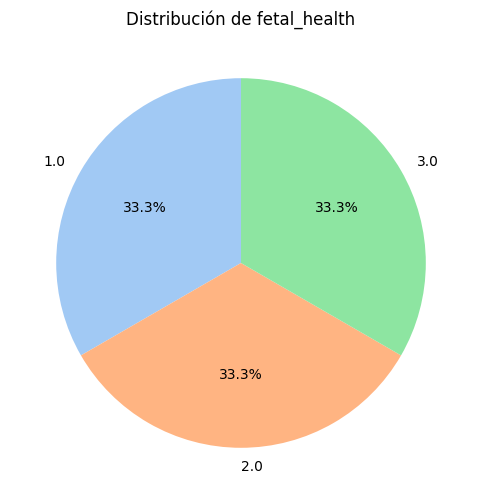

In [26]:

# Graficar diagrama de pie
plt.figure(figsize=(6, 6))
data_balanced['fetal_health'].astype('object').value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'))
plt.title('Distribución de fetal_health')
plt.ylabel('')
plt.show()

En clasificación transformamos las X, le aplicamos OneHotEnconder y el minmaxescaler

In [28]:
X = data_balanced.drop(columns = ['fetal_health'])
y = data_balanced['fetal_health']
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (4965, 21)
y shape: (4965,)


# 4 Paso: Transformación de las variables


In [32]:
# Aquí creamos el preprocessor para las variables numericas y categoricas
# Escala las variables numéricas a un rango entre 0 y 1
# el OneHotEncoder convierte las variables categóricas en variables binarias (0 o 1), una por cada categoría posible.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = X.select_dtypes(include = ['object']).columns.to_list()
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_col),
                                                  ('cat', cat_transformer, cat_col)],
                                                  remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['baseline value', 'accelerations',
                                  'fetal_movement', 'uterine_contractions',
                                  'light_decelerations', 'severe_decelerations',
                                  'prolongued_decelerations',
                                  'abnormal_short_term_variability',
                                  'mean_value_of_short_term_variability',
                                  'percentage_of_time_with_abnormal_long_term_variability',
                                  'mean_value_of_long_term_variability',
                                  'histogram_width', 'histogram_min',
                                  'histogram_max', 'histogram_number_of_peaks',
                                  'histogram_number_of_zeroes',
                                  'histogram_mode', 'histogram_mean',
                                  'histogram_median', 'histogram_variance',
                                  'histogram_tendency']),
                                ('cat',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 [])])

In [33]:
X_pre = preprocessor.fit_transform(X)
# cod_cat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col])
X_pro = pd.DataFrame(X_pre, columns = labels, index = X.index)
X_pro.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.481481,0.315789,0.000000,0.400000,0.200000,0.0,0.0,0.066667,0.279412,0.0,...,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
1,0.500000,0.157895,0.000000,0.533333,0.200000,0.0,0.0,0.053333,0.279412,0.0,...,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
2,0.518519,0.157895,0.000000,0.533333,0.200000,0.0,0.0,0.053333,0.323529,0.0,...,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
3,0.481481,0.368421,0.000000,0.533333,0.000000,0.0,0.0,0.053333,0.323529,0.0,...,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0
4,0.462963,0.263158,0.149688,0.533333,0.200000,0.0,0.0,0.213333,0.176471,0.0,...,0.355932,0.348624,0.275862,0.277778,0.0,0.590551,0.559633,0.550459,0.026022,1.0
5,0.462963,0.473684,0.461538,0.400000,0.133333,0.0,0.0,0.213333,0.191176,0.0,...,0.474576,0.192661,0.310345,0.111111,0.0,0.637795,0.587156,0.587156,0.037175,1.0
6,0.444444,0.315789,0.848233,0.266667,0.333333,0.0,0.2,0.120000,0.308824,0.0,...,0.587571,0.155963,0.448276,0.388889,0.0,0.653543,0.477064,0.532110,0.282528,0.5
7,0.444444,0.315789,0.790021,0.266667,0.266667,0.0,0.2,0.093333,0.308824,0.0,...,0.587571,0.155963,0.448276,0.166667,0.0,0.582677,0.495413,0.513761,0.159851,0.5
8,0.444444,0.315789,0.916840,0.333333,0.333333,0.0,0.0,0.160000,0.279412,0.0,...,0.689266,0.027523,0.482759,0.277778,0.0,0.653543,0.504587,0.559633,0.260223,1.0
9,0.444444,0.157895,0.937630,0.400000,0.266667,0.0,0.2,0.146667,0.250000,0.0,...,0.542373,0.082569,0.310345,0.333333,0.0,0.574803,0.467890,0.477064,0.133829,1.0


In [34]:
from sklearn.model_selection import train_test_split
# Plantar semilla: np.random.seed(25), regresión lineal no usa aleatorios podemos obtener los coeficientes
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.7, random_state=123)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')
# Mirar en la separación como quedó el balance de la variable objetivo (y) ya que esto es aleatorio y puede quedar mal. Es importante tener representación de todas las clases en cada conjunto

X_train shape: (3475, 21), y_train shape: (3475,)
X_test shape: (1490, 21), y_test shape: (1490,)


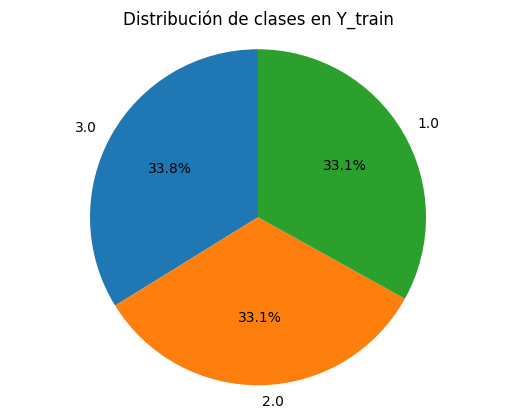

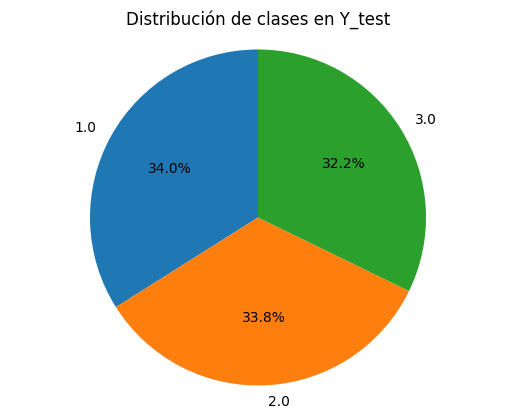

In [35]:
# Grafico de Y entrenamiento y Y validación
plt.pie(x = y_train.value_counts(),
        labels = y_train.value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de clases en Y_train')
plt.axis('equal')
plt.show()

plt.pie(x = y_test.value_counts(),
        labels = y_test.value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de clases en Y_test')
plt.axis('equal')
plt.show()

# 7. Modelado de Datos

# Siguiente etapa: Modelos de clasificación

#### Busqueda de hiperparámetros con validación cruzada
Región de búsqueda para los hiperparámetros, el motivo es evitar el sobre ajuste.

Estados de los modelos:
1. Ajustado
2. Subajustado
3. Sobreajustado

Escenarios de ajuste depende de las medidas de desempeño del modelo tanto en validación como entrenamiento.

Desempeño:
1. Desempeño Entre = Desempeño Validaición -> 1 **Ajustado**
2. Entre = Validacion < 0.5 **Subajustado**
3. Entre >>> Validacion (+20%) **Sobreajustado**

¿Cómo se llaman las medidas de desempeños para clasificación?

En agrupamiento era el índice de siloe

Para Clasificación son, parte de un hecho dicotómico:
1. Matriz de confusión: Capacidad que tiene el modelo de equivocarse

     0: Positiva 1: Negativa

     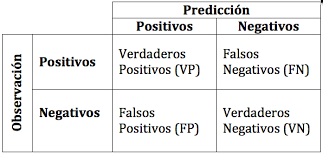

     De esta sale el Accuracy, que es la relación de verdad sobre todos los individuos. Va de 0 a 1.

     También está la Precisión, verdadero positivos sobre VP + FN, cuando tiende a 1 quiere decir que los individuos de la clase 0 están predichos.

     Recall VP sobre VP + FP.

     F1 Score que mezcla Precission y Recall.

La validación cruzada hace un split para ajustar y validar el modelo

#### Regresión logistica

Metodo del gradiente descendiente que es el método con el que se entrenan redes neuronales. Proceso iterativo para encontrar los valores de alpha para llegar a que el costo sea 0 para que los alpha sub i.

Beta es el paso de aproximación, beta es la tasa de aprendizaje, es el hiperparámetro de la regresión logística.

#### Naive Bayes

#### Maquinas de Soporte Vectorial

#### Árboles de decisión

#### Bosques aleatorios

#### Adaptative Boosting

#### Gradient Boosting

#### Redes neuronales perceptrón multicapa

## Busqueda de Hiperparámetros

**Exhaustiva:**
Crea tantos modelos como posibles combinaciones de los hiperparámetros y los ajusta todos. Si tenemos un hiperparámetro 1 con los siguientes valores h1: [0,5,46,50] y otro h2: [a,b,c]. La cantidad de modelos es la combinación de los valores, en este caso sería 12.

**Aleaotorizada:**
Crea una muestra aleatoria de todos los posibles modelos construidos por la combinación de los hiperparámetros. h1:[0,5,28,32] y h2: [a,b,c] no coge todas las combinaciones, solo algunas. 

Exhaustiva para cuando tenemos pocos datos y Aleatorizada cuando tenemso muchos, pero si queremos precisión usamos Exhaustiva.

Los folds son particiones de los datos para evaluar los modelos, el numero de folds no debe ser mayor a 10, sirve para evitar el sobre ajuste.

Este código está explorando diferentes combinaciones de regularización (penalty) y fuerza de regularización (C) para encontrar el mejor modelo de regresión logística, usando validación cruzada para que el resultado sea más confiable.

In [36]:
# Regresión logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Teoricamente la regresión logistica solo tiene un hiperparámetro, pero cuando lo construimos podemos poner otro que es la penalización.

modelo_1 = LogisticRegression(solver='saga', random_state=123)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_1 = GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy') # cv son los folds, debe ser impar para que evitemos paridad, en scoring le decimos cual metrica de desempeño utilizar, ponemos F1 porque queremos modelos que sean capaces de estimar correctamte las tres clases y como el F1 mezcla el recall y la precisión nos sive. Pero en este caso no nos da porque F1 solito solo sirve para problemas de dos posibles clase, en este caso es de 3 clases. Todos los modelos están diseñados para trabajar con dos clases, para una clasificación multiclase existen dos aproximaciones: Uno contra uno y Uno contra Todos.
clf_1.fit(X_train, y_train) # 24 modelos y 5 experimentos por modelos


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [37]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']),
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['accuracy'])], axis=1)
validation.sort_values(by='accuracy', ascending=False)


,C,penalty,accuracy
12,1.0000,l1,0.866187
16,10.0000,l2,0.863309
21,1000.0000,l1,0.861583
15,10.0000,l1,0.861583
18,100.0000,l1,0.861295
22,1000.0000,l2,0.861295
19,100.0000,l2,0.861007
13,1.0000,l2,0.857554
10,0.1000,l2,0.849209
9,0.1000,l1,0.844317


Entre mas grande sea el valor de C estoy dandole permiso para que se equivoque más.

In [38]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=1, penalty='l1', random_state=123, solver='saga')

Metricas de Desempeño en Entrenamiento1
              precision    recall  f1-score   support

         1.0       0.93      0.87      0.90      1149
         2.0       0.81      0.85      0.83      1151
         3.0       0.88      0.88      0.88      1175

    accuracy                           0.87      3475
   macro avg       0.87      0.87      0.87      3475
weighted avg       0.87      0.87      0.87      3475



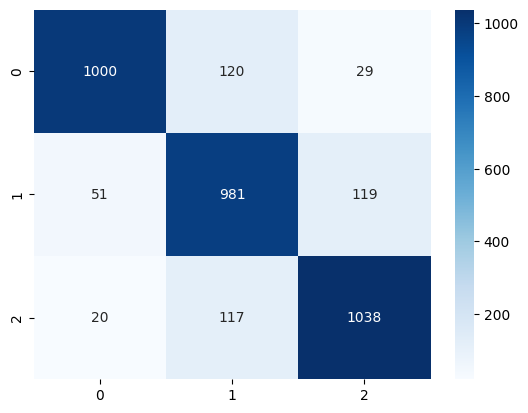

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_1_train = modelo_1_final.predict(X_train)
print('Metricas de Desempeño en Entrenamiento1')
print(classification_report(y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(y_train, y_pred_1_train), annot=True, fmt='d', cmap='Blues')
plt.show()

Esto nos asegura que no está sobre ajustado pero no significa que sea un mejor modelo.

Metricas de Desempeño en validación
              precision    recall  f1-score   support

         1.0       0.94      0.85      0.89       506
         2.0       0.81      0.86      0.83       504
         3.0       0.86      0.89      0.87       480

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.87      0.87      0.87      1490



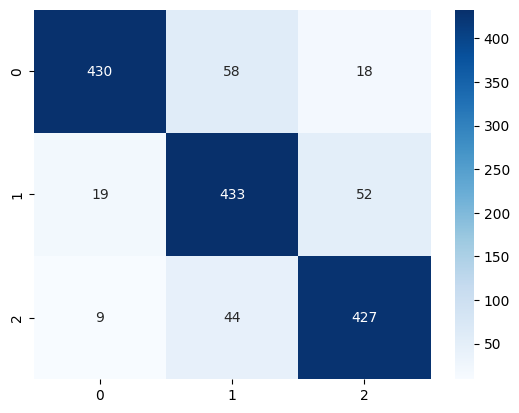

In [40]:
# Metricas de desempeño en validación
y_pred_test_1 = modelo_1_final.predict(X_test)
print('Metricas de Desempeño en validación')
print(classification_report(y_test, y_pred_test_1))
sb.heatmap(confusion_matrix(y_test, y_pred_test_1), annot=True, fmt='d', cmap='Blues')
plt.show()

#### K vecinos más cercanos

Tiene un comportamiento sico sociológico.

Utiliza 2 hiperparámetros que son: **cantidad de vecinos: K** y la **Forma de distancia: Euclidiana (p-q)^2 o Manhattan |p-q|** *El valor para K TIENE que ser impar. El valor para K es un entero positivo que va hasta la cantidad de individuos.

Asociarse a los K vecimos donde la distancia sea mínima.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
modelo_2 = KNeighborsClassifier() # No tiene estado aleatorio porque utiliza la distancia entre puntos para clasificar
param_grid = {'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]} # Distancia de milkovsky, 1 manhattan 2 euclidiana
clf_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted') # f1_weighted es para problemas multiclase
clf_2.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]},
             scoring='f1_weighted')

In [42]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1'])], axis=1)
validation.sort_values(by='f1', ascending=False)


,n_neighbors,p,f1
1,3,2,0.960427
0,3,1,0.960403
2,5,1,0.936553
3,5,2,0.935617
5,7,2,0.919686
4,7,1,0.918628
6,19,1,0.895520
8,21,1,0.890819
7,19,2,0.887398
9,21,2,0.884054


Mejor modelo segun el f1 es

In [43]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

KNeighborsClassifier(n_neighbors=3)

Metricas de Desempeño en Entrenamiento2
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97      1149
         2.0       0.96      1.00      0.98      1151
         3.0       1.00      1.00      1.00      1175

    accuracy                           0.98      3475
   macro avg       0.98      0.98      0.98      3475
weighted avg       0.98      0.98      0.98      3475



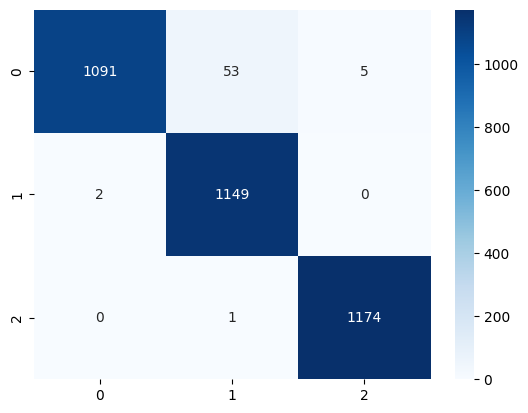

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_2_train = modelo_2_final.predict(X_train)
print('Metricas de Desempeño en Entrenamiento2')
print(classification_report(y_train, y_pred_2_train))
sb.heatmap(confusion_matrix(y_train, y_pred_2_train), annot=True, fmt='d', cmap='Blues')
plt.show()

Metricas de Desempeño en validación
              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       506
         2.0       0.94      1.00      0.97       504
         3.0       0.99      0.99      0.99       480

    accuracy                           0.97      1490
   macro avg       0.98      0.97      0.97      1490
weighted avg       0.98      0.97      0.97      1490



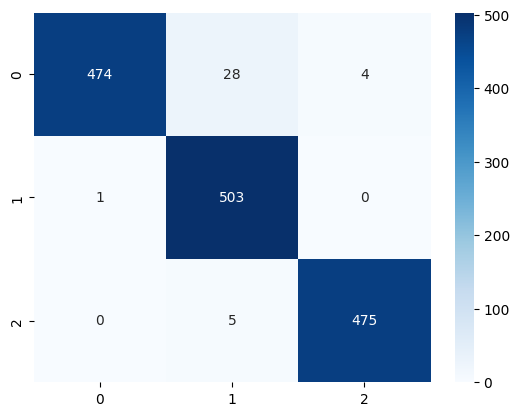

In [45]:
# Metricas de desempeño en validación
y_pred_test_2 = modelo_2_final.predict(X_test)
print('Metricas de Desempeño en validación')
print(classification_report(y_test, y_pred_test_2))
sb.heatmap(confusion_matrix(y_test, y_pred_test_2), annot=True, fmt='d', cmap='Blues')
plt.show()